In [2]:
cd /Users/bastus/Desktop/Forschungsprojekt/genimpro

/Users/bastus/Desktop/Forschungsprojekt/genimpro


In [4]:
%run importwrapper.py
%pylab inline
samplerate=44100.0

ImportError: dlopen(/usr/local/lib/python2.7/site-packages/essentia/_essentia.so, 2): Library not loaded: /usr/local/lib/libavformat.56.dylib
  Referenced from: /usr/local/lib/python2.7/site-packages/essentia/_essentia.so
  Reason: image not found

Populating the interactive namespace from numpy and matplotlib


In [5]:
import essentia

ImportError: dlopen(/usr/local/lib/python2.7/site-packages/essentia/_essentia.so, 2): Library not loaded: /usr/local/lib/libavformat.56.dylib
  Referenced from: /usr/local/lib/python2.7/site-packages/essentia/_essentia.so
  Reason: image not found

In [6]:
from __future__ import print_function

In [7]:
import msaf

In [8]:
import librosa
import seaborn as sns

In [12]:
# and IPython.display for audio output
import IPython.display

# Setup nice plots
sns.set(style="dark")
%matplotlib inline

1/                  genImpro.db*        import.py*          sonicevents.py*
2/                  genimpro.py         importwrapper.py    sonicevents.pyc
3/                  genimpro.pyc        notebooks/          utility.py*
LICENSE             grouping-old.py     recordings.py       visualization/
README.md           grouping.py         recordings.pyc      webservice.py*
Untitled0.ipynb     grouping.pyc        rp_extract.py       webservice.pyc
genImpro-backup.db* import/             rp_extract.pyc


In [15]:
# Choose an audio file and listen to it
audio_file = "3/6d4ead71-8c79-4484-a6e1-b2e3eebcde4d.aiff"
IPython.display.Audio(filename=audio_file)

In [16]:

# Segment the file using the default MSAF parameters
boundaries, labels = msaf.process(audio_file)
print(boundaries)

/Library/Python/2.7/site-packages/numpy/core/numeric.py:482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return array(a, dtype, copy=False, order=order)


[  0.           0.60371882  11.9814966   26.33142857  34.08689342
  36.27736961]


In [25]:
# First, let's list all the available boundary algorithms
print(msaf.get_all_boundary_algorithms())

['cnmf', 'example', 'foote', 'olda', 'scluster', 'sf']


In [37]:
# Let's check what available features are there in MSAF
print(msaf.features_registry)

{'tempogram': <class 'msaf.features.Tempogram'>, 'pcp': <class 'msaf.features.PCP'>, 'mfcc': <class 'msaf.features.MFCC'>, 'tonnetz': <class 'msaf.features.Tonnetz'>, 'cqt': <class 'msaf.features.CQT'>}


In [108]:
bid = "foote"  # Boundaries ID
lid = None     # Labels ID
feature = "mfcc"
config = msaf.io.get_configuration(feature, annot_beats=False, framesync=False, 
                                   boundaries_id=bid, labels_id=lid)

In [119]:
config

{'L_peaks': 200,
 'M_gaussian': 25,
 'annot_beats': False,
 'feature': 'mfcc',
 'features': <msaf.features.MFCC at 0x1114d1b90>,
 'framesync': False,
 'hier': False,
 'm_median': 1}

In [126]:
from essentia.standard import *

In [116]:
config['m_median'] = 1
config['M_gaussian'] = 25
config['L_peaks'] = 200


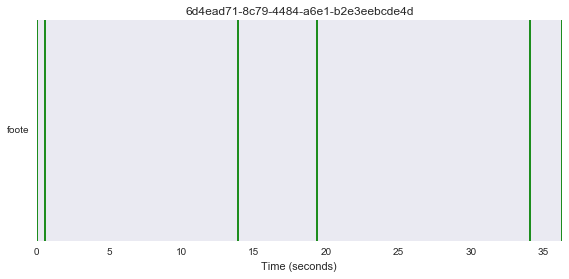

In [117]:
boundaries, labels = msaf.process(audio_file, feature="mfcc", boundaries_id="foote", plot=True,config=config)

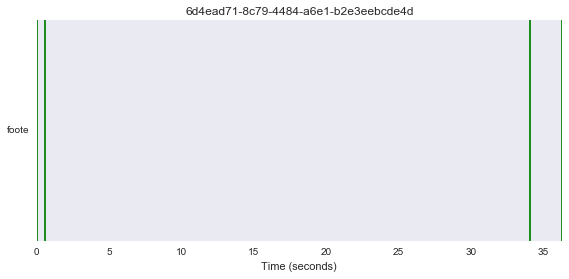

In [99]:
# play around with IPython.Widgets
from ipywidgets import interact

# Obtain the default configuration
bid = "foote"  # Boundaries ID
lid = None     # Labels ID
feature = "pcp"
config = msaf.io.get_configuration(feature, annot_beats=False, framesync=False, 
                                   boundaries_id=bid, labels_id=lid)

# Sweep M_gaussian parameters
@interact(M_gaussian=(50, 500, 25))
def _run_msaf(M_gaussian):
    # Set the configuration
    config["M_gaussian"] = M_gaussian
    
    # Segment the file using the Foote method, and Pitch Class Profiles for the features
    results = msaf.process(audio_file, feature=feature, boundaries_id=bid, 
                           config=config, plot=True)


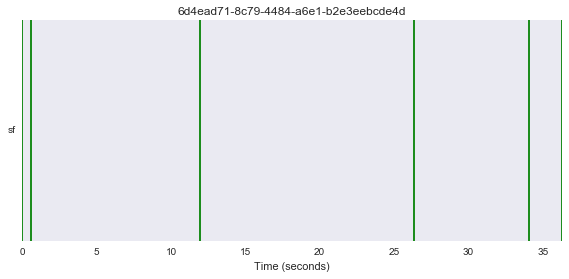

In [24]:
# Try one of these boundary algorithms and print results
boundaries, labels = msaf.process(audio_file, boundaries_id="sf", plot=True)

In [18]:
# Sonify boundaries
sonified_file = "my_boundaries.wav"
sr = 44100
boundaries, labels = msaf.process(audio_file, sonify_bounds=True, 
                                  out_bounds=sonified_file, out_sr=sr)

# Listen to results
audio = librosa.load(sonified_file, sr=sr)[0]
IPython.display.Audio(audio, rate=sr)

/Library/Python/2.7/site-packages/mir_eval/sonify.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  click_signal = np.zeros(length)
